#Análisis del Problema

El conjunto de datos contiene valores de laboratorio de donantes de sangre y pacientes con hepatitis C. Se pretende categorizar el tipo de hepatitis de un paciente.


## Descarga de los archivos de datos:
https://drive.google.com/file/d/14y3i4aUH_g2-gPe9XYX8MEq2znIbU56K/view?usp=sharing

### Autores
* Andrey Marín Chacón
* David González Agüero

#Entendimiento de los datos

El presente conjunto de datos contiene las siguientes características:

* Los atributos del 1 al 4 se refieren a los datos del paciente:

1. **X**: (ID/Número de paciente)
2. **Category** (diagnóstico) (valores: '0=Donante de Sangre', '0s=Donante de Sangre sospechoso', '1=Hepatitis', '2=Fibrosis', '3=Cirrosis')
3. **Age**: edad en años
4. **Sex**: Female, Male

* Los atributos del 5 al 14 se refieren a datos de laboratorio:
5. **ALB**
6. **ALP**
7. **ALT**
8. **AST**
9. **BIL**
10. **CHE**
11. **CHOL**
12. **CREA**
13. **GGT**
14. **PROT**


#Exploración de los datos

## Imports

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import joblib

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

##1. Lectura del conjunto de datos

In [ ]:
df = pd.read_csv("sample_data/HepatitisCdata.csv")

##2. Visualización preliminar de la información

In [ ]:
df.head(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


Ejecutando el siguiente comando para corroborar si existen o no valores nulos, nos muestra en el resultado que las características **ALB**, **ALP**, **ALT**, **CHOL**, **PROT** contiene valores nulos.

In [ ]:
# Comprobación de si existen valores nulos
is_null = df.isna().any()
is_null[is_null]

ALB     True
ALP     True
ALT     True
CHOL    True
PROT    True
dtype: bool

Ahora vamos a ver cuántos valores nulos de cada categoría hay:

In [ ]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

En un gráfico de barras vamos a mostrar la cantidad de valores:

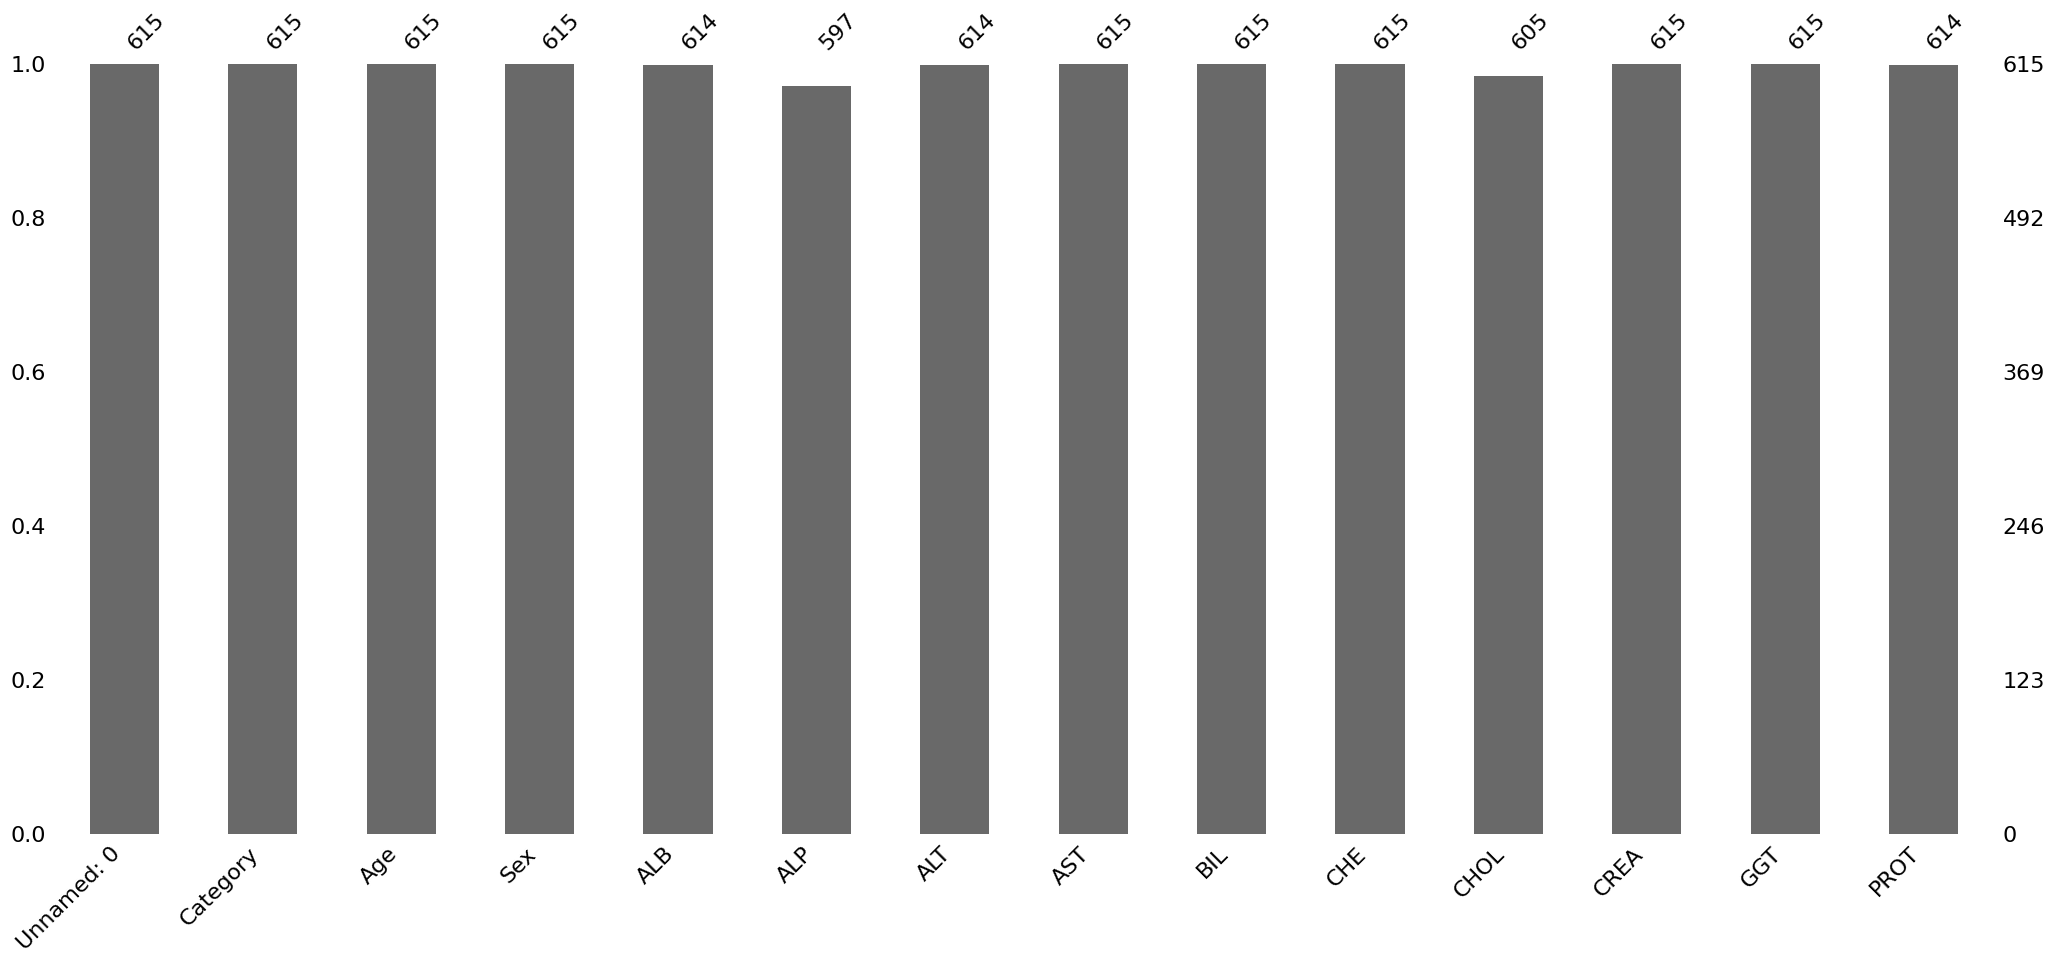

In [ ]:
msno.bar(df)
plt.show()

No existen valores infinitos, nos retorna una lista vacía.

In [ ]:
# Comprobación de la existencia de valores infinitos
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

In [ ]:
#Rellenamos los valores nulos con la mediana

imputer = SimpleImputer(strategy="median")

In [ ]:
#Hacemos una copia del Df
df_copy = df.copy()

In [ ]:
# La clase imputer no admite valores categoricos, eliminamos los atributos categoricos
df_prep = df_copy.select_dtypes(exclude=['object'])

# Se le proporcionan los atributos numericos para que calcule los valores
imputer.fit(df_prep)

SimpleImputer(strategy='median')

In [ ]:
# Rellenamos los valores nulos
df_prep_nonan = imputer.transform(df_prep)

In [ ]:
df_prep_nonan

array([[  1. ,  32. ,  38.5, ..., 106. ,  12.1,  69. ],
       [  2. ,  32. ,  38.5, ...,  74. ,  15.6,  76.5],
       [  3. ,  32. ,  46.9, ...,  86. ,  33.2,  79.3],
       ...,
       [613. ,  64. ,  29. , ...,  66.7,  64.2,  82. ],
       [614. ,  46. ,  33. , ...,  52. ,  50. ,  71. ],
       [615. ,  59. ,  36. , ...,  67. ,  34. ,  68. ]])

In [ ]:
# Transformamos el resultado a un DataFrame de Pandas
df_copy_2 = pd.DataFrame(df_prep_nonan, columns=df_prep.columns)

In [ ]:
df_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    float64
 1   Age         615 non-null    float64
 2   ALB         615 non-null    float64
 3   ALP         615 non-null    float64
 4   ALT         615 non-null    float64
 5   AST         615 non-null    float64
 6   BIL         615 non-null    float64
 7   CHE         615 non-null    float64
 8   CHOL        615 non-null    float64
 9   CREA        615 non-null    float64
 10  GGT         615 non-null    float64
 11  PROT        615 non-null    float64
dtypes: float64(12)
memory usage: 57.8 KB


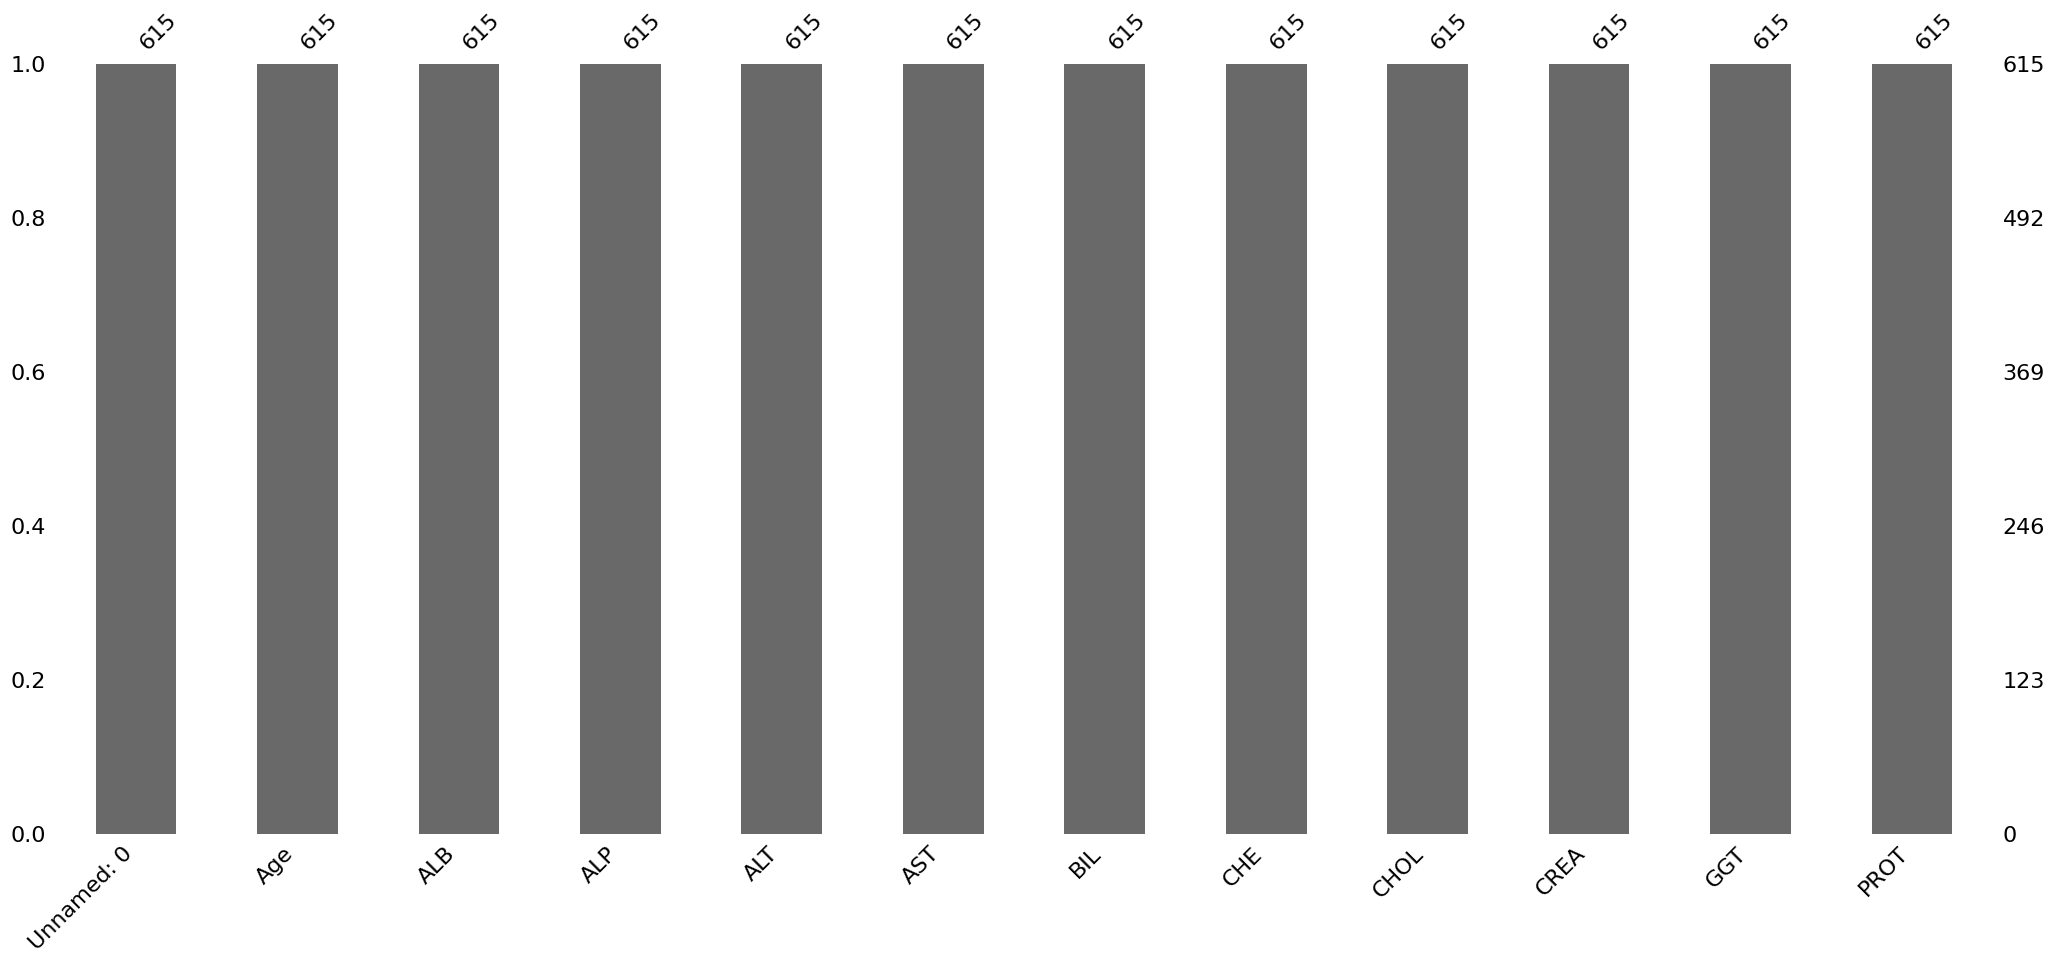

In [ ]:
msno.bar(df_copy_2)
plt.show()

In [ ]:
#Eliminamos las caracteristicas numerocas de df_copy, para asi evitar que al unir las numericas de df_copy_2 se dupliquen
columnas_a_eliminar = ['Unnamed: 0', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
df_copy = df_copy.drop(columnas_a_eliminar, axis=1)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  615 non-null    object
 1   Sex       615 non-null    object
dtypes: object(2)
memory usage: 9.7+ KB


In [ ]:
# Pegamos todas las caracteristicas al dataframe df_final
df_final = pd.concat([df_copy, df_copy_2], axis=1)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    615 non-null    object 
 1   Sex         615 non-null    object 
 2   Unnamed: 0  615 non-null    float64
 3   Age         615 non-null    float64
 4   ALB         615 non-null    float64
 5   ALP         615 non-null    float64
 6   ALT         615 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        615 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        615 non-null    float64
dtypes: float64(12), object(2)
memory usage: 67.4+ KB


In [ ]:
# Unnamed: 0 es irrelevante, entonces se va a eliminar de nuestro dataFrame
df_final = df_final.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Le indicamos que incluya todas las columnas, sin importar que no sean numéricas
df_final.describe(include = 'all')

,Category,Sex,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615,615,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
unique,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0=Blood Donor,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,533,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,47.408130,41.620732,68.222927,28.441951,34.786341,11.396748,8.196634,5.366992,81.287805,39.533171,72.044390
std,NaN,NaN,10.055105,5.775935,25.646364,25.449889,33.090690,19.673150,2.205657,1.123499,49.756166,54.661071,5.398238
min,NaN,NaN,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,NaN,NaN,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,NaN,NaN,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,NaN,NaN,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000


<Axes: >

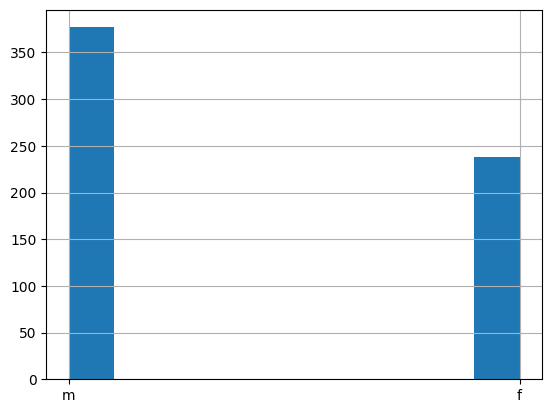

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["Sex"].hist()

<Axes: >

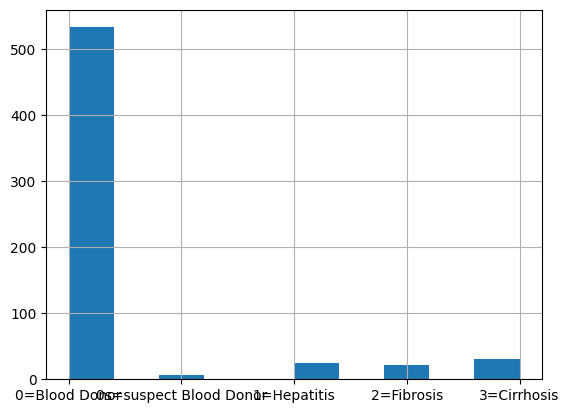

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["Category"].hist()

In [ ]:
# Mostrar los valores únicos que tiene un atributo determinado
df["Category"].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [ ]:
#Transformamos categoricas a numéricas
labelEncoder = LabelEncoder()
df_final['Category'] = labelEncoder.fit_transform(df_final['Category'])
df_final['Sex'] = labelEncoder.fit_transform(df_final['Sex'])


In [ ]:
df_final.head(3)

,Category,Sex,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,1,32.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,1,32.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,1,32.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3


Nuevos valores numéricos de Category
* **0** = Blodd Donor
* **1** = suspect Blood Donor
* **2** = Hepatitis
* **3** = Fibrosis
* **4** = Cirrhosis

In [ ]:
# Mostrar los valores únicos que tiene un atributo determinado
df_final["Category"].value_counts()

0    533
4     30
2     24
3     21
1      7
Name: Category, dtype: int64

De color rojo son los que clasificaría con Hepatitis:

<ipython-input-59-179bd76d12be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[df_final['Category'] == 0]['ALT'],color='blue')
<ipython-input-59-179bd76d12be>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[df_final['Category'] == 2]['ALT'],color='red')


(10.0, 100.0)

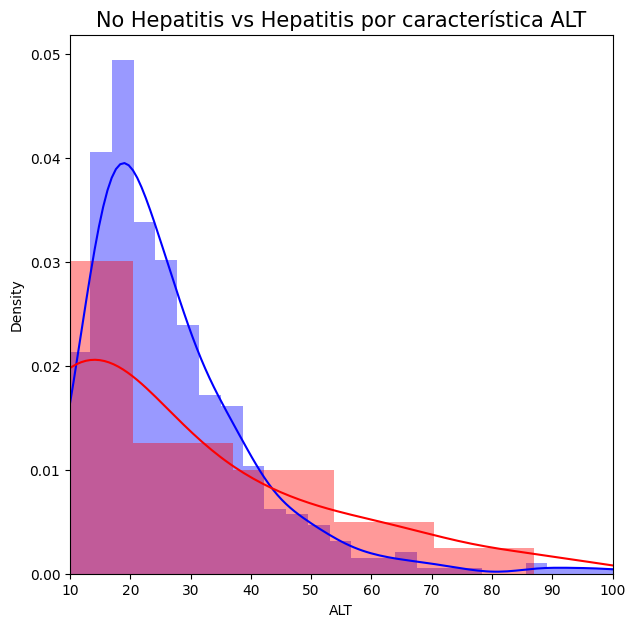

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df_final[df_final['Category'] == 0]['ALT'],color='blue')
sns.distplot(df_final[df_final['Category'] == 2]['ALT'],color='red')

plt.title('No Hepatitis vs Hepatitis por característica ALT',fontsize=15)
plt.xlim([10,100])

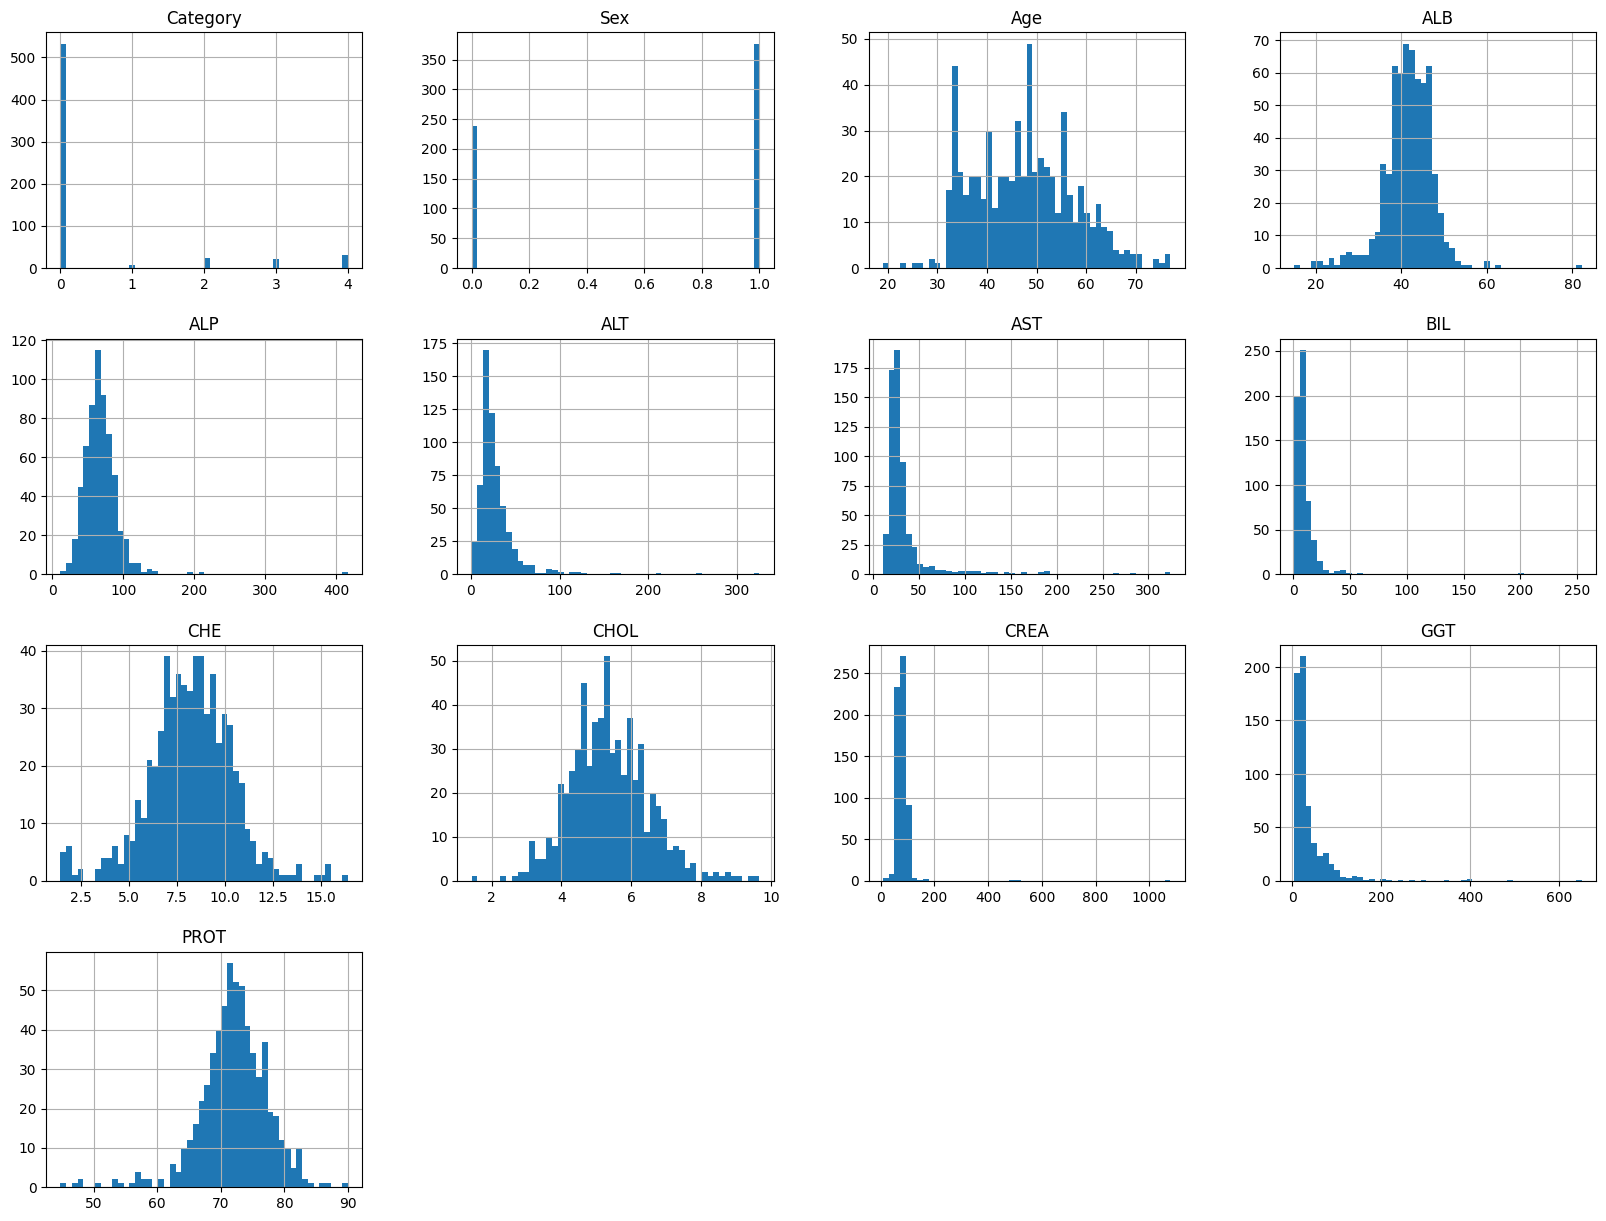

In [ ]:
# Representar gráficamente la distribución de los atributos
df_final.hist(bins=50, figsize=(20, 15))
plt.show()

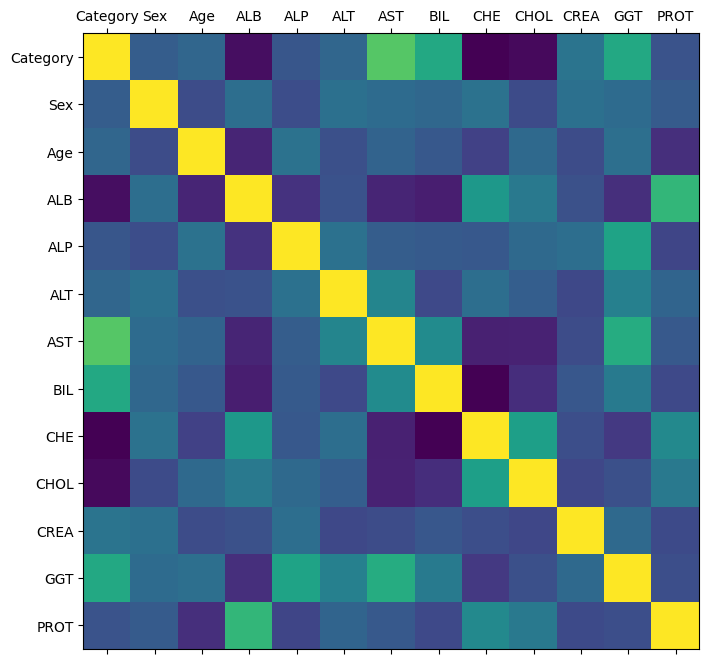

In [ ]:
# Representar gráficamente la matriz de correlación
corr = df_final.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
# Mostrar la correlación entre los atributos del conjunto de datos
corr_matrix = df_final.corr()
corr_matrix["Category"].sort_values(ascending=False)

Category    1.000000
AST         0.648341
BIL         0.473006
GGT         0.471164
CREA        0.182040
Age         0.106341
ALT         0.105831
Sex         0.060657
ALP         0.022193
PROT        0.007321
ALB        -0.285147
CHOL       -0.300914
CHE        -0.329472
Name: Category, dtype: float64

##3. Division del conjunto de datos

In [ ]:
# División del conjunto de datos 80/20 ya que son poquitos datos
train_set, test_set = train_test_split(df_final, test_size=0.2, random_state=42)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 83 to 102
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  492 non-null    int64  
 1   Sex       492 non-null    int64  
 2   Age       492 non-null    float64
 3   ALB       492 non-null    float64
 4   ALP       492 non-null    float64
 5   ALT       492 non-null    float64
 6   AST       492 non-null    float64
 7   BIL       492 non-null    float64
 8   CHE       492 non-null    float64
 9   CHOL      492 non-null    float64
 10  CREA      492 non-null    float64
 11  GGT       492 non-null    float64
 12  PROT      492 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 53.8 KB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 248 to 336
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  123 non-null    int64  
 1   Sex       123 non-null    int64  
 2   Age       123 non-null    float64
 3   ALB       123 non-null    float64
 4   ALP       123 non-null    float64
 5   ALT       123 non-null    float64
 6   AST       123 non-null    float64
 7   BIL       123 non-null    float64
 8   CHE       123 non-null    float64
 9   CHOL      123 non-null    float64
 10  CREA      123 non-null    float64
 11  GGT       123 non-null    float64
 12  PROT      123 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 13.5 KB


##4. Preparación del conjunto de datos

In [ ]:
# Separamos las características de entrada de la característica de salida
X_train = train_set.drop("Category", axis=1)
y_train = train_set["Category"].copy()

X_test = test_set.drop("Category", axis=1)
y_test = test_set["Category"].copy()

In [ ]:
X_train.shape

(492, 12)

In [ ]:
X_test.shape

(123, 12)

In [ ]:
y_train.shape

(492,)

In [ ]:
y_test.shape

(123,)

In [ ]:
X_train.head(50)

,Sex,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
83,1,39.0,36.6,71.3,28.9,25.9,6.1,5.70,4.66,77.0,22.6,66.3
90,1,39.0,45.8,62.5,20.7,22.8,45.5,8.61,4.78,77.0,15.9,75.5
228,1,53.0,44.5,61.2,14.4,18.1,8.0,6.95,5.00,70.0,18.3,72.0
509,0,58.0,26.3,52.5,39.5,77.2,5.8,5.15,3.53,40.0,31.2,51.0
329,0,33.0,42.4,137.2,14.2,13.1,3.4,8.23,5.30,48.0,25.7,74.4
425,0,48.0,35.2,45.4,23.4,27.1,4.9,6.83,4.35,70.0,11.8,72.1
79,1,38.0,40.5,61.7,18.6,24.7,6.7,8.47,6.05,89.0,19.6,75.6
23,1,34.0,43.4,46.1,97.8,46.2,11.3,7.99,3.62,71.0,35.3,69.6
158,1,46.0,37.3,91.6,33.4,35.9,2.6,9.74,6.73,78.0,64.2,69.9
292,1,63.0,40.8,74.3,25.0,27.5,5.5,7.74,6.35,107.0,50.4,69.3


#Arbol Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

MAX_DEPTH = 20


clf_tree = DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=42)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [ ]:
# Predecimos con el conjunto de datos de validación
y_pred = clf_tree.predict(X_test)

In [ ]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

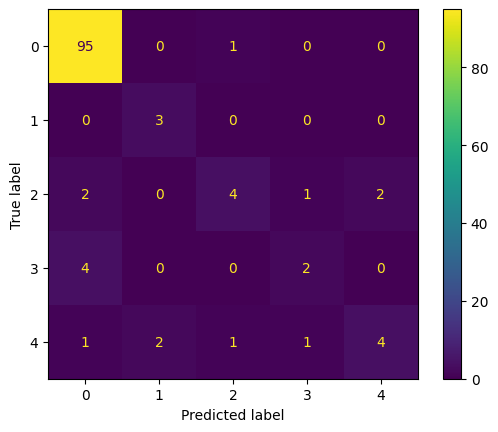

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf_tree.classes_)
cm_display.plot()

###Precisión

In [ ]:
# Intuición sobre falsos positivos que predice el modelo. En este caso como no es binario (la y) entonces tenemos que indicar un parámetro mas, llamado average. Existen varios tipos de average: macro, micro, weighted
# LE indicamos average igual micro
print("Precisión:", precision_score(y_test, y_pred, pos_label=0.0,  average='micro', ))

Precisión: 0.8780487804878049


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0.0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### Recall

In [ ]:
# LE indicamos average igual micro
print("Recall:", recall_score(y_test, y_pred, pos_label=0.0, average='micro'))

Recall: 0.8780487804878049


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0.0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### F1 Score

In [ ]:
# Le indicamos average igual weighted
print("F1 score:", f1_score(y_test, y_pred, pos_label=0.0, average='weighted'))

F1 score: 0.8648066026114807


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0.0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# Salvar el modelo en archivo .pkl
joblib.dump(clf_tree, "06HepatitisPaciente.pkl")

['06HepatitisPaciente.pkl']

In [ ]:
# Cargar modelo
#svmCargado = joblib.load("06HepatitisPaciente.pkl")

#Conclusión
Podemos ver que el algoritmo de árbol de decisión para este conjunto de datos presenta una Precisión del 87%, también su Recall es de 87% al igual que si F1 Score que es de 86%. Podemos ver por medio de la matriz de confusión que clasifica bastante bien para los casos en donde es donador de sangre, pero para los casos de hepatitis y el resto de opciones da resultados no tan buenos, esto puede ser a la gran desigualdad de las muestras en donde claramente la primera muestra se tienen muchos datos mientras que para el resto no.